In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

#Load Dataset

In [ ]:
# download dataset
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chamindumunasinghe
Your Kaggle Key: ··········
Your Kaggle Key: ··········


100%|██████████| 217M/217M [00:12<00:00, 18.2MB/s]


In [79]:
BATCH_SIZE = 5
IMAGE_SIZE = (128,128)

In [80]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [81]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [82]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [83]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(5, 128, 128, 3)
(5,)


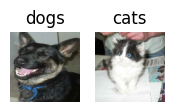

In [90]:
# plot data sample
plt.figure(figsize=(2,2))
for image,label in train_data.take(1):
    for i in range(2):
        ax = plt.subplot(2,2,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

#Scaling Images

In [91]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[2.05578125e+02 2.04578125e+02 2.09578125e+02]
   [2.10381592e+02 2.09381592e+02 2.14381592e+02]
   [2.17803955e+02 2.16803955e+02 2.21803955e+02]
   ...
   [1.93204834e+02 1.97204834e+02 1.98204834e+02]
   [1.84040283e+02 1.88040283e+02 1.89040283e+02]
   [1.85510010e+02 1.89510010e+02 1.90510010e+02]]

  [[2.04015625e+02 2.03015625e+02 2.08015625e+02]
   [2.08878662e+02 2.07878662e+02 2.12878662e+02]
   [2.16652344e+02 2.15652344e+02 2.20652344e+02]
   ...
   [2.02418701e+02 2.06418701e+02 2.07418701e+02]
   [1.84593262e+02 1.88593262e+02 1.89593262e+02]
   [1.88392090e+02 1.92392090e+02 1.93392090e+02]]

  [[2.05203125e+02 2.04203125e+02 2.09203125e+02]
   [2.09902344e+02 2.08902344e+02 2.13902344e+02]
   [2.16890381e+02 2.15890381e+02 2.20890381e+02]
   ...
   [2.10871094e+02 2.14871094e+02 2.15871094e+02]
   [1.87089844e+02 1.91089844e+02 1.92089844e+02]
   [1.87028076e+02 1.91028076e+02 1.92028076e+02]]

  ...

  [[7.82512207e+01 1.28251221e+02 3.92512207e+01]
   [6

In [92]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [93]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[3.9610860e-01 4.0787330e-01 4.2748114e-01]
   [4.3558660e-01 4.4202045e-01 4.4825512e-01]
   [4.6131483e-01 4.5220995e-01 4.4154495e-01]
   ...
   [5.0926453e-01 5.2122837e-01 5.3423393e-01]
   [4.9753919e-01 5.2197242e-01 5.3212869e-01]
   [5.0549102e-01 5.4506695e-01 5.4880840e-01]]

  [[3.3411878e-01 3.4588349e-01 3.6549133e-01]
   [3.8969606e-01 3.9134222e-01 3.9917278e-01]
   [4.4707006e-01 4.4312912e-01 4.3156356e-01]
   ...
   [4.5772871e-01 4.7341499e-01 4.8517969e-01]
   [4.7034866e-01 4.9478185e-01 5.0493813e-01]
   [5.4429597e-01 5.7679373e-01 5.8407426e-01]]

  [[3.6291361e-01 3.7216607e-01 3.9051777e-01]
   [3.5912177e-01 3.6073023e-01 3.6857337e-01]
   [4.1327012e-01 4.0934855e-01 3.9902380e-01]
   ...
   [4.7348011e-01 4.9224457e-01 5.0400931e-01]
   [5.1064491e-01 5.3025275e-01 5.4201746e-01]
   [4.9931952e-01 5.2692366e-01 5.3602296e-01]]

  ...

  [[4.6303937e-01 4.7872567e-01 4.9049038e-01]
   [4.7693169e-01 4.9261796e-01 5.0438267e-01]
   [5.1194519e-

#Data Augmentation

In [94]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)


#Model Building

In [95]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [96]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)      

In [97]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#Model Training

In [99]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
1440/1440 [==============================] - 20s 14ms/step - loss: 0.6329 - accuracy: 0.6375 - val_loss: 0.6274 - val_accuracy: 0.5913
Epoch 2/20
1440/1440 [==============================] - 17s 12ms/step - loss: 0.6176 - accuracy: 0.6585 - val_loss: 0.6928 - val_accuracy: 0.6350
Epoch 3/20
1440/1440 [==============================] - 19s 13ms/step - loss: 0.6188 - accuracy: 0.6565 - val_loss: 0.5836 - val_accuracy: 0.6850
Epoch 4/20
1440/1440 [==============================] - 17s 12ms/step - loss: 0.6067 - accuracy: 0.6646 - val_loss: 0.6521 - val_accuracy: 0.6338
Epoch 5/20
1440/1440 [==============================] - 17s 12ms/step - loss: 0.6005 - accuracy: 0.6726 - val_loss: 0.5589 - val_accuracy: 0.7088
Epoch 6/20
1440/1440 [==============================] - 18s 12ms/step - loss: 0.5856 - accuracy: 0.6918 - val_loss: 0.5447 - val_accuracy: 0.7150
Epoch 7/20
1440/1440 [==============================] - 17s 12ms/step - loss: 0.5727 - accuracy: 0.6979 - val_loss: 0.5308 -

In [100]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')


Total time for training 383.783 seconds


#Performance Analysis

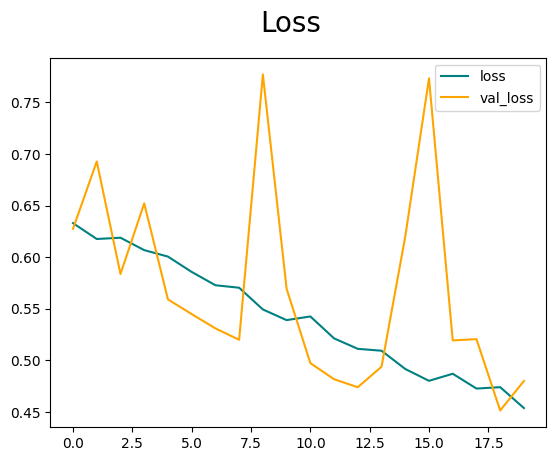

In [101]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

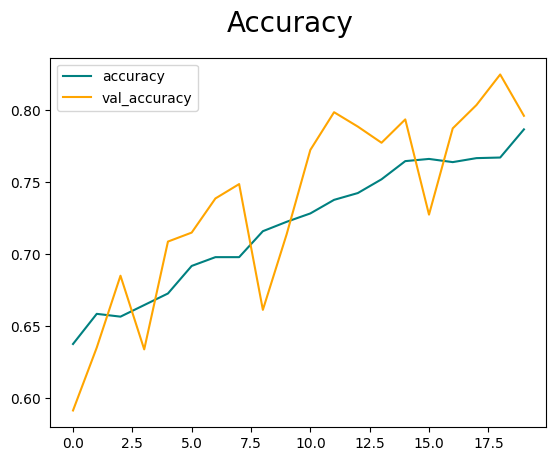

In [102]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

#Model Evaluation

In [103]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [104]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 19ms/step


In [105]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.79708636>

In [106]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.766>

In [107]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7855>


#Test

In [108]:
!pip install opencv-python -q

In [109]:
import cv2

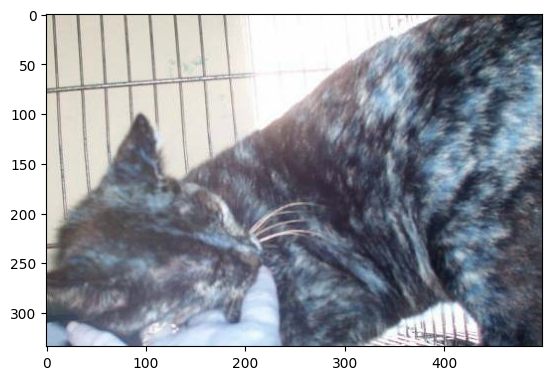

In [131]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4006.jpg')
plt.imshow(img)
plt.show()

In [132]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [133]:
scaled_image.shape

TensorShape([128, 128, 3])

In [134]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [135]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 20ms/step


In [136]:
yhat

array([[0.13274999]], dtype=float32)

In [137]:
class_names

['cats', 'dogs']

In [138]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

cats


In [139]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
